# AIG140 Assignment#3: Logistic Regression for Breast Cancer Diagnosis
## Objective
In this assignment, you will apply logistic regression to a real-world medical dataset, predicting whether a tumor is malignant or benign based on measurements of cell nuclei.

In [2]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import pandas as pd
# import kagglehub
# from kagglehub import KaggleDatasetAdapter
# # Load the dataset
# try:
#   df = kagglehub.load_dataset(
#     KaggleDatasetAdapter.PANDAS, #   KaggleDatasetAdapter.HUGGING_FACE,
#     "uciml/breast-cancer-wisconsin-data",
#     "data.csv"
#   )
# except Exception as e:
#   df = None
#   print(f"Error loading dataset: {e}")
#   path = kagglehub.dataset_download("uciml/breast-cancer-wisconsin-data")
#   # Try different encodings
#   encodings = ['utf-8', 'latin1', 'iso-8859-1', 'cp1252']
#   for encoding in encodings:
#     try:
#       df = pd.read_csv(path + "\\data.csv", encoding=encoding)
#       print(f"Successfully loaded with {encoding} encoding")
#       break
#     except UnicodeDecodeError:
#       continue
#     except Exception as e:
#       print(f"Error with {encoding} encoding: {e}")
#       continue
# sklearn.datasets.load_breast_cancer()
import sklearn.datasets
data = sklearn.datasets.load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [3]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [4]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [5]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [7]:
X = df[['mean radius', 'mean texture']].values
y = df['target'].values

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [9]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

## Part 5: Partial Sigmoid Plots
You will plot TWO sigmoid curves, each showing the effect of one variable while fixing the other as constant.

In [10]:
X

array([[17.99, 10.38],
       [20.57, 17.77],
       [19.69, 21.25],
       ...,
       [16.6 , 28.08],
       [20.6 , 29.33],
       [ 7.76, 24.54]], shape=(569, 2))

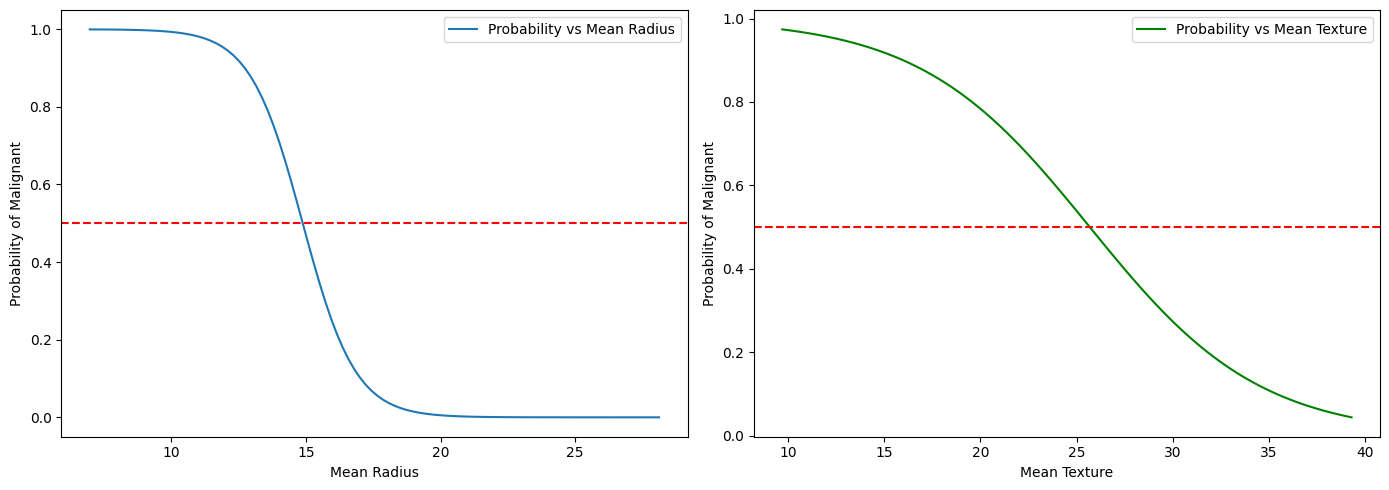

In [42]:
# Sigmoid Curve #1: Predict probability as mean radius varies (mean texture fixed)
import numpy as np
import matplotlib.pyplot as plt



# Prepare data for plots
fixed_texture = np.median(X[:, 1])
radius_range = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
X_radius_varying = np.column_stack((radius_range, np.full_like(radius_range, fixed_texture)))
y_proba_radius = model.predict_proba(X_radius_varying)[:, 1]

fixed_radius = np.median(X[:, 0])
texture_range = np.linspace(X[:, 1].min(), X[:, 1].max(), 100)
X_texture_varying = np.column_stack((np.full_like(texture_range, fixed_radius), texture_range))
y_proba_texture = model.predict_proba(X_texture_varying)[:, 1]

# Create plots side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Sigmoid Curve #1
axes[0].plot(radius_range, y_proba_radius, label='Probability vs Mean Radius')
axes[0].axhline(0.5, color='red', linestyle='--')
axes[0].set_xlabel('Mean Radius')
axes[0].set_ylabel('Probability of Malignant')
axes[0].legend()

# Sigmoid Curve #2
axes[1].plot(texture_range, y_proba_texture, label='Probability vs Mean Texture', color='green')
axes[1].axhline(0.5, color='red', linestyle='--')
axes[1].set_xlabel('Mean Texture')
axes[1].set_ylabel('Probability of Malignant')
axes[1].legend()

plt.tight_layout()
plt.show()


## Part 6: Model Evaluation
Evaluate the model using confusion matrix and classification report.

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay
import seaborn as sns
import json
y_pred = model.predict(X_test)

Confusion Matrix:
[[40  7]
 [ 5 62]]


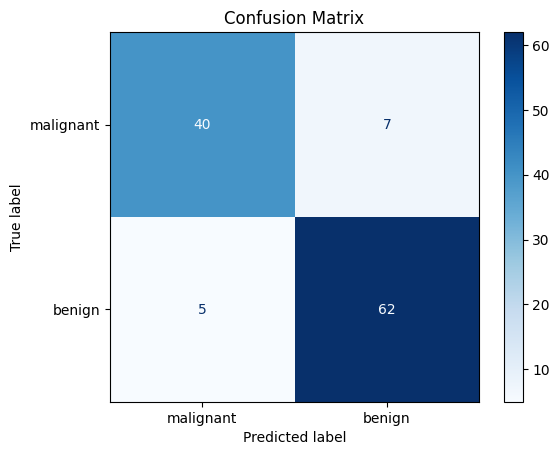

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=data.target_names)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

Classification Report:
{
    "0": {
        "precision": 0.8888888888888888,
        "recall": 0.851063829787234,
        "f1-score": 0.8695652173913043,
        "support": 47.0
    },
    "1": {
        "precision": 0.8985507246376812,
        "recall": 0.9253731343283582,
        "f1-score": 0.9117647058823529,
        "support": 67.0
    },
    "accuracy": 0.8947368421052632,
    "macro avg": {
        "precision": 0.893719806763285,
        "recall": 0.8882184820577961,
        "f1-score": 0.8906649616368286,
        "support": 114.0
    },
    "weighted avg": {
        "precision": 0.8945673362149336,
        "recall": 0.8947368421052632,
        "f1-score": 0.8943666711535873,
        "support": 114.0
    }
}


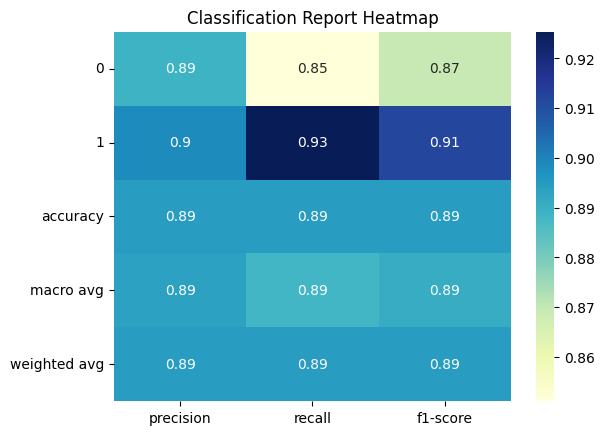

In [ ]:
class_report = classification_report(y_test, y_pred, output_dict=True) # classification_report(y_test, y_pred)
print('Classification Report:')
report_df = pd.DataFrame(class_report).transpose()
print(json.dumps(class_report, indent=4))
sns.heatmap(report_df.drop(columns=['support']), annot=True, cmap='YlGnBu')
plt.title('Classification Report Heatmap')
plt.show()

### Interpretation


High Accuracy (89%): Model performs well overall.

Precision and Recall:

- Class "0" has slightly lower recall, meaning some samples labeled "0" were incorrectly predicted as "1".

- Class "1" has very strong recall (93%) and precision (90%), indicating it's effectively identifying this class correctly.

F1-score is consistently high for both classes, showing a good overall balance.

Conclusion:
This model demonstrates strong performance, particularly good at predicting class "1" with high reliability, and relatively good at predicting class "0", although it can still improve slightly in reducing false positives for class "1".

## Part 7: Plotting the 2D Decision Boundary
Visualize the decision boundary using a contour plot.

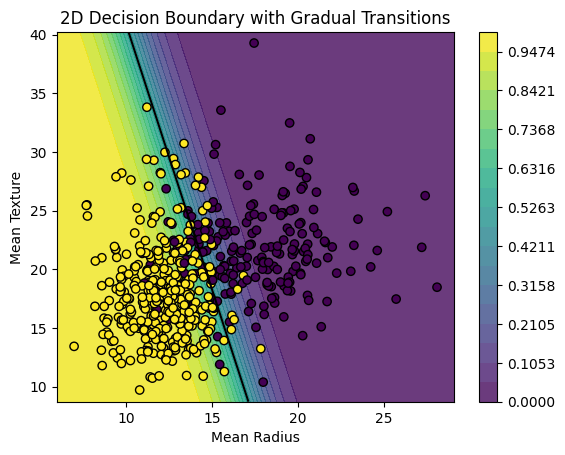

In [73]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), 
                     np.arange(y_min, y_max, 0.1))
Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]  # Probability of class '1'
Z = Z.reshape(xx.shape)
# plt.contourf(xx, yy, Z, alpha=0.3)
contour = plt.contourf(xx, yy, Z, levels=np.linspace(0, 1, 20), alpha=0.8)
plt.contour(xx, yy, Z, levels=[0.5], colors='black', linewidths=1.5) # Changing for Bonus Points
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k')
plt.xlabel('Mean Radius')
plt.ylabel('Mean Texture')
plt.title('2D Decision Boundary with Gradual Transitions')
plt.colorbar(contour)
plt.show()

### Part 8: Interpretation

#### 1. How well does the model perform overall?
- The model performs very well overall, achieving an accuracy of approximately **89%**. Precision, recall, and F1-scores are consistently high, suggesting a reliable model.

#### 2. Is it better at predicting benign or malignant tumors?
- The model is slightly better at predicting **benign tumors (class "1")**, with higher precision (**89.9%**), recall (**92.5%**), and F1-score (**91.2%**) compared to malignant tumors (class "0"), which have slightly lower recall (**85.1%**) and F1-score (**86.9%**).

#### 3. Do the partial plots help you understand each feature's contribution?
- Yes, the partial plots clearly show how each individual feature influences the probability of a tumor being malignant:
  - **Mean Radius**: Strong predictor, clearly separating probabilities of malignancy.
  - **Mean Texture**: Also a good predictor but exhibits a smoother transition, indicating its influence is more gradual compared to radius.

These plots clarify the contribution of each feature independently.

#### 4. Does the 2D boundary confirm or extend what you saw in the 1D plots?
- The 2D decision boundary confirms the insights from the 1D partial plots but also extends them by demonstrating how the combination of **Mean Radius** and **Mean Texture** jointly defines the classification boundary. The gradient transition highlights how radius is slightly more influential (steeper boundary), confirming its greater predictive power noted in the 1D plots.

#### 5. Would using more features likely improve the model? Why, and if so, what would you include next?
- Yes, adding more features would likely improve the model by providing additional relevant information that enhances the discrimination between benign and malignant tumors. Good candidates for additional features include:

  - **Mean Smoothness or Compactness**: Reflect textural uniformity or irregularity.
  - **Mean Concavity or Concave Points**: Highly predictive features in breast cancer diagnosis.
  - **Fractal Dimension**: Captures irregular patterns that correlate strongly with malignancy.

Including these features, frequently utilized in cancer detection datasets, would likely increase the predictive accuracy and robustness of the model.

